In [1]:
from PIL import Image
import numpy as np
import os
import pandas as pd
from tqdm.notebook import tqdm 

### Načtení dat
Funkce načte obrazy a metadata z definovaných cest a vrátila by je jako Numpy pole. Pak bychom mohli tyto data použít při trénování modelu GAN, přičemž bychom mohli model upravit tak, aby byl podmíněný, což znamená, že by generoval obrazy na základě zadání metadat (např. generování obrazu žilního řečiště pro muže ve věku 25 let, který je kuřákem).

In [2]:
from PIL import Image
import numpy as np
import os
import pandas as pd
from pathlib import Path

def load_data(metadata_path, data_directory, num_folders=1):
    metadata = pd.read_excel(metadata_path)
    
    images = []
    labels = []
    
    # Count total images in the dataset directory
    total_images = sum(1 for _ in Path(data_directory).rglob('*.png'))
    
    finger_folders = ["l_index", "l_little", "l_middle", "l_ring", "l_thumb", 
                      "r_index", "r_little", "r_middle", "r_ring", "r_thumb"]
    
    progress_bar = tqdm(total=total_images, desc='Loading images', dynamic_ncols=True)
    
    for index, row in metadata.iterrows():
        if index >= num_folders:
            break
            
        for finger_folder in finger_folders:
            folder_path = Path(data_directory) / str(row['id']) / finger_folder
            
            if folder_path.exists():
                image_files = list(folder_path.glob("*.png"))
                
                for img_path in image_files:
                    img = Image.open(img_path)
                    img = np.array(img)
                    
                    images.append(img)
                    
                    label = {
                        'id': row['id'],
                        'gender': row['gender'],
                        'age': row['age'],
                        'melanin': row['melanin'],
                        'cardiovascular_disease': row['cardiovascular disease'],
                        'smoker': row['smoker'],
                        'sport_hobby_with_fingers': row['sport/hobby with fingers'],
                        'alcohol_before_scan': row['alcohol before scan'],
                        'skin_disease': row['skin disease'],
                        'finger': finger_folder
                    }
                    labels.append(label)
                    progress_bar.update(1)
                
    progress_bar.close()
    return np.array(images), labels

# You can call this function to load the data:
images, labels = load_data("data_description.xlsx", "dataset")



Loading images:   0%|          | 0/1458 [00:00<?, ?it/s]

### Images preprocessing

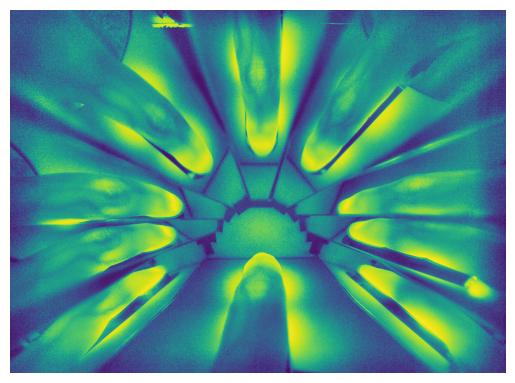

In [11]:
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess a single image
def preprocess_image(image):
    # Convert PIL Image to numpy array
    img_array = np.array(image)

    # Check if the image has an alpha channel (transparency)
    # If it does, we need to remove it because the exposure.equalize_adapthist
    # function expects an image with 1 (grayscale) or 3 (RGB) channels
    if img_array.shape[-1] == 4:
        # Remove the alpha channel
        img_array = img_array[..., :3]

    # Apply histogram equalization
    # This function expects an image with intensities ranging [0, 1], so we normalize the image_array.
    equalized_img_array = exposure.equalize_adapthist(img_array / np.max(img_array), clip_limit=0.03)

    # Convert the numpy array back to a PIL Image
    processed_image = Image.fromarray((equalized_img_array * 255).astype(np.uint8))

    return processed_image

# Now preprocess and display the first image
processed_image = preprocess_image(images[0])

# Display the preprocessed first image
plt.imshow(processed_image)
plt.axis('off')  # Hide axis
plt.show()


### Model Implementation and Training

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.optimizers import Adam

# Generator
class Generator():
    pass
    # Add your generator architecture here

# Discriminator
class Discriminator():
    pass
    # Add your discriminator architecture here

# Training function
def train_model(generator, discriminator):
    pass
    # Add your training loop here


### Synthetic Image Generation

In [ ]:
def generate_images(generator, num_images):
    # code to generate synthetic images
    pass

### Result Verification

In [ ]:
def verify_results(synthetic_images):
    # Add your verification code here
    pass